# <font color=red> IMDb Horror Movie Genre 👻

In [1]:
import numpy as np
import pandas as pd
import matplotlib 
import matplotlib.pyplot as plt
from matplotlib.pyplot import show
import seaborn as sns 
from pandas_profiling import ProfileReport

%matplotlib inline

### Working only with the data of movies classified as horror as their main or subgenre

In [2]:
movies_horror = pd.read_csv('./Genres/data_movies_ratings_Horror.csv')

In [3]:
movies_horror.head(5)

,imdb_title_id,title,year,date_published,genre,duration,country,language,director,writer,...,females_30age_avg_vote,females_30age_votes,females_45age_avg_vote,females_45age_votes,top1000_voters_rating,top1000_voters_votes,us_voters_rating,us_voters_votes,non_us_voters_rating,non_us_voters_votes
0,tt0003419,Der Student von Prag,1913,1913-08-22,"Drama, Fantasy, Horror",85,Germany,"German, English","Paul Wegener, Stellan Rye","Hanns Heinz Ewers, Hanns Heinz Ewers",...,6.5,89,7.2,69,6.2,114,6.3,338,6.5,921
1,tt0003643,The Avenging Conscience: or 'Thou Shalt Not Kill',1914,1914-08-24,"Crime, Drama, Horror",78,USA,English,D.W. Griffith,"Edgar Allan Poe, D.W. Griffith",...,7.0,34,7.1,211,6.5,85,6.5,576,6.5,321
2,tt0004026,Der Golem,1915,1915-04-08,Horror,60,Germany,German,"Henrik Galeen, Paul Wegener","Henrik Galeen, Paul Wegener",...,6.7,67,6.2,89,6.5,53,6.8,413,6.7,356
3,tt0005529,Hævnens Nat,1916,1916-09-25,"Crime, Drama, Horror",100,Denmark,NaN,Benjamin Christensen,Benjamin Christensen,...,7.8,9,7.6,15,6.7,37,7.1,53,6.8,147
4,tt0005951,Rapsodia satanica,1917,1917-07-01,"Drama, Fantasy, Horror",55,Italy,NaN,Nino Oxilia,"Alberto Fassini, Alberto Fassini",...,6.8,28,7.8,21,6.7,66,7.1,82,6.8,331


### Split genre column to isolate each individual genre

In [4]:
movies_horror_genres = (movies_horror['genre'].str.split(',', expand=True)).reset_index(drop=True)
movies_horror_genres

,0,1,2
0,Drama,Fantasy,Horror
1,Crime,Drama,Horror
2,Horror,None,None
3,Crime,Drama,Horror
4,Drama,Fantasy,Horror
...,...,...,...
9036,Horror,Thriller,None
9037,Comedy,Horror,Sci-Fi
9038,Horror,None,None
9039,Horror,Thriller,None


In [5]:
movies_horror_genres = movies_horror_genres.rename(columns={0:'Genre_1', 1:'Genre_2', 2:'Genre_3'})
movies_horror_genres

,Genre_1,Genre_2,Genre_3
0,Drama,Fantasy,Horror
1,Crime,Drama,Horror
2,Horror,None,None
3,Crime,Drama,Horror
4,Drama,Fantasy,Horror
...,...,...,...
9036,Horror,Thriller,None
9037,Comedy,Horror,Sci-Fi
9038,Horror,None,None
9039,Horror,Thriller,None


In [6]:
movies_horror = pd.concat([movies_horror_genres, movies_horror], axis=1)


In [7]:
movies_horror.isnull().sum()/len(movies_horror)*100

Genre_1                      0.000000
Genre_2                     24.211923
Genre_3                     56.077867
imdb_title_id                0.000000
title                        0.000000
year                         0.000000
date_published               0.000000
genre                        0.000000
duration                     0.000000
country                      0.110607
language                     1.139255
director                     0.066364
writer                       1.305165
production_company           5.773698
avg_vote                     0.000000
votes                        0.000000
reviews_from_users           0.000000
reviews_from_critics         0.000000
weighted_average_vote        0.000000
total_votes                  0.000000
males_allages_avg_vote       0.000000
males_allages_votes          0.000000
males_18age_avg_vote         0.000000
males_18age_votes            0.000000
males_30age_avg_vote         0.000000
males_30age_votes            0.000000
males_45age_

### Spliting country column to isolate each individual country

In [8]:
movies_horror_country = (movies_horror['country'].str.split(',', expand=True)).reset_index(drop=True)
movies_horror_country.isnull().sum()/len(movies_horror_genres)*100

0     0.110607
1    86.284703
2    96.361022
3    99.093021
4    99.712421
5    99.867271
6    99.966818
7    99.977879
dtype: float64

In [9]:
drop_country = [1,2,3,4,5,6,7]
movies_horror_country = movies_horror_country.drop(drop_country, axis=1)

In [10]:
movies_horror_country = movies_horror_country.rename(columns={0:'country_1'})
movies_horror_country

,country_1
0,Germany
1,USA
2,Germany
3,Denmark
4,Italy
...,...
9036,Malaysia
9037,USA
9038,USA
9039,USA


In [11]:
movies_horror = pd.concat([movies_horror_country, movies_horror], axis=1)

In [12]:
movies_horror.columns

Index(['country_1', 'Genre_1', 'Genre_2', 'Genre_3', 'imdb_title_id', 'title',
       'year', 'date_published', 'genre', 'duration', 'country', 'language',
       'director', 'writer', 'production_company', 'avg_vote', 'votes',
       'reviews_from_users', 'reviews_from_critics', 'weighted_average_vote',
       'total_votes', 'males_allages_avg_vote', 'males_allages_votes',
       'males_18age_avg_vote', 'males_18age_votes', 'males_30age_avg_vote',
       'males_30age_votes', 'males_45age_avg_vote', 'males_45age_votes',
       'females_allages_avg_vote', 'females_allages_votes',
       'females_18age_avg_vote', 'females_18age_votes',
       'females_30age_avg_vote', 'females_30age_votes',
       'females_45age_avg_vote', 'females_45age_votes',
       'top1000_voters_rating', 'top1000_voters_votes', 'us_voters_rating',
       'us_voters_votes', 'non_us_voters_rating', 'non_us_voters_votes'],
      dtype='object')

In [13]:
drop_extra_cols = ['country', 'genre']
movies_horror = movies_horror.drop(drop_extra_cols, axis=1)

In [14]:
movies_horror.columns

Index(['country_1', 'Genre_1', 'Genre_2', 'Genre_3', 'imdb_title_id', 'title',
       'year', 'date_published', 'duration', 'language', 'director', 'writer',
       'production_company', 'avg_vote', 'votes', 'reviews_from_users',
       'reviews_from_critics', 'weighted_average_vote', 'total_votes',
       'males_allages_avg_vote', 'males_allages_votes', 'males_18age_avg_vote',
       'males_18age_votes', 'males_30age_avg_vote', 'males_30age_votes',
       'males_45age_avg_vote', 'males_45age_votes', 'females_allages_avg_vote',
       'females_allages_votes', 'females_18age_avg_vote',
       'females_18age_votes', 'females_30age_avg_vote', 'females_30age_votes',
       'females_45age_avg_vote', 'females_45age_votes',
       'top1000_voters_rating', 'top1000_voters_votes', 'us_voters_rating',
       'us_voters_votes', 'non_us_voters_rating', 'non_us_voters_votes'],
      dtype='object')

### Exploring the data (plots and group by's)

In [15]:
movies_horror_year = movies_horror.groupby('year', as_index=False).agg({'imdb_title_id':'count'})

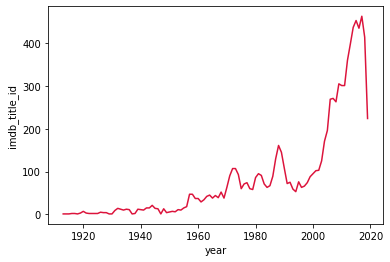

In [16]:
ax = sns.lineplot(data = movies_horror_year, 
               x='year',
               y='imdb_title_id',
               color='crimson')

In [17]:
movies_horror_country_grouped = movies_horror.groupby('country_1', as_index=False).agg({'imdb_title_id':'count'})

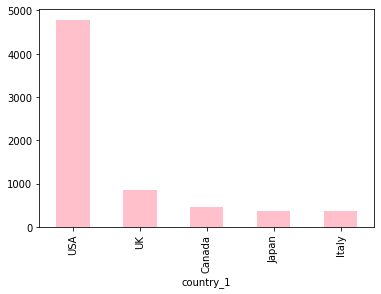

In [18]:
movies_horror.groupby('country_1').imdb_title_id.count().sort_values(ascending=False)[:5].plot.bar(color='pink')

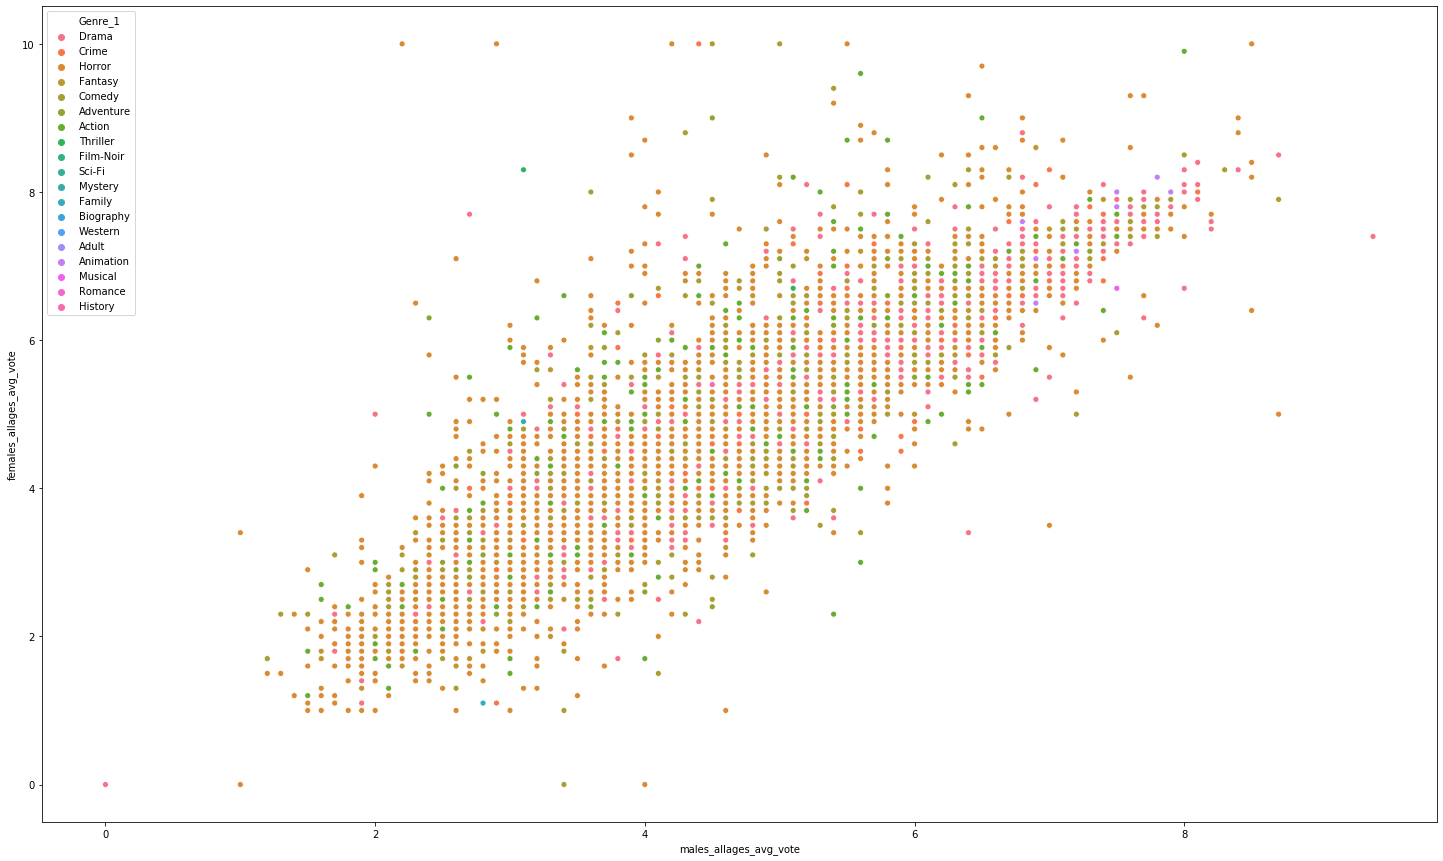

In [19]:
fig, ax = plt.subplots(figsize=(25,15))

ax = sns.scatterplot(x='males_allages_avg_vote', y='females_allages_avg_vote', hue='Genre_1', data=movies_horror)

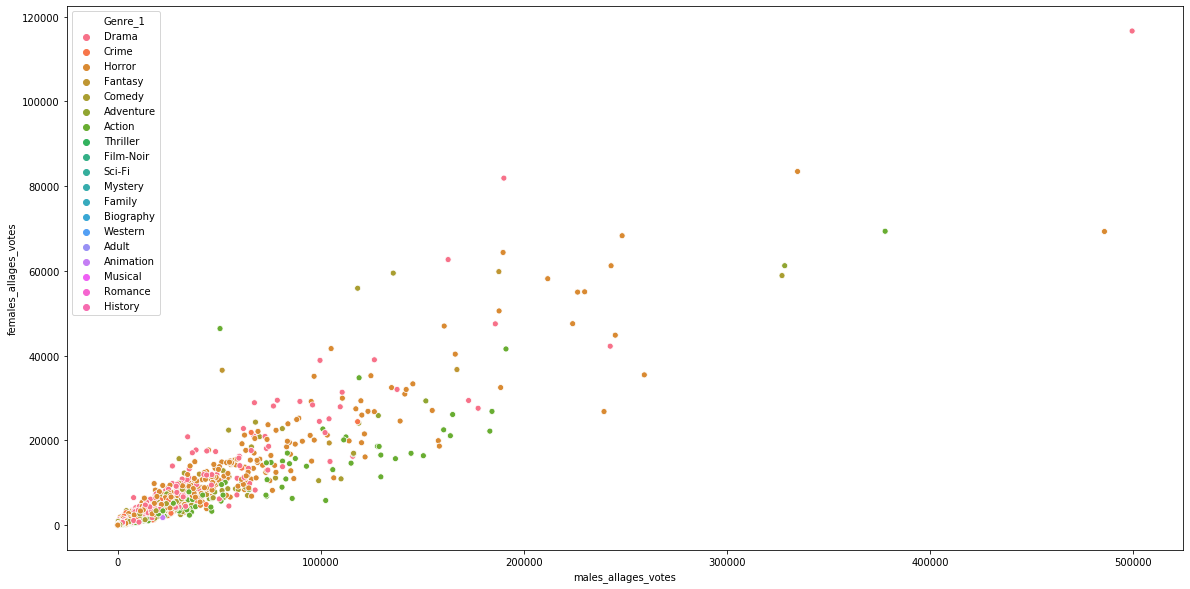

In [20]:
fig, ax = plt.subplots(figsize=(20,10))
ax = sns.scatterplot(x='males_allages_votes', y='females_allages_votes', hue='Genre_1', data=movies_horror)

### Stats

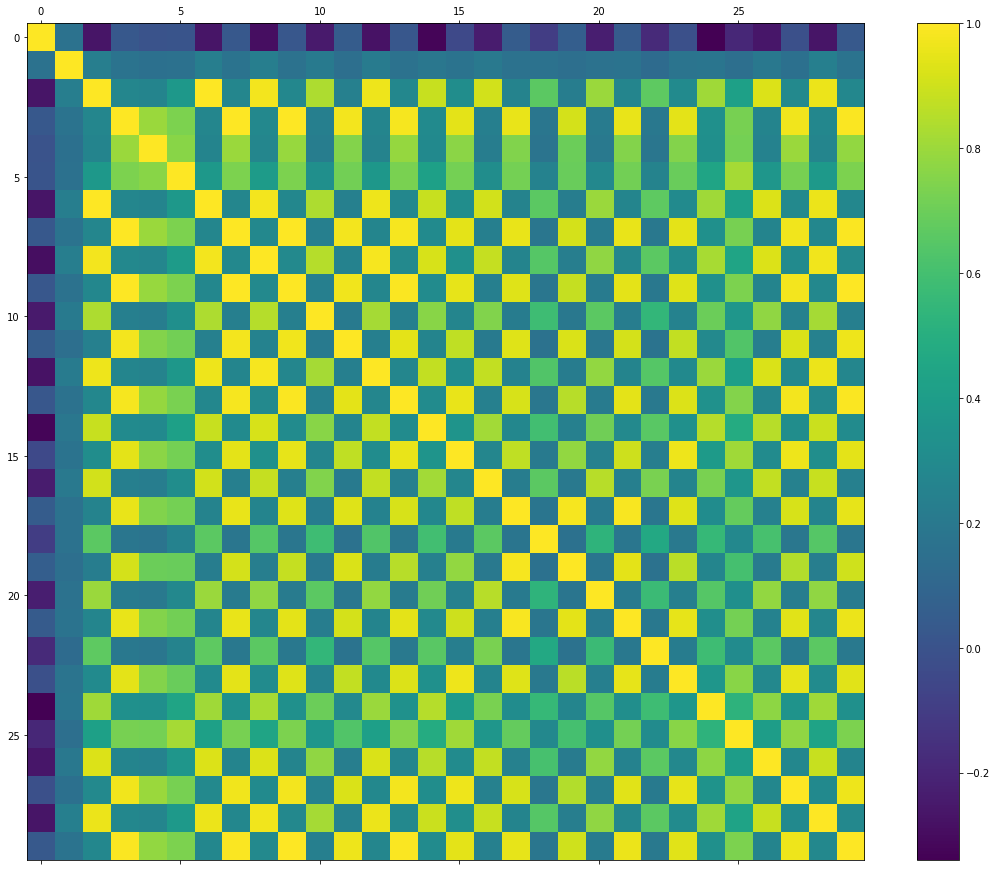

In [21]:
h = plt.figure(figsize=(19,15))

plt.matshow(movies_horror.corr(), fignum=h.number)

cb = plt.colorbar()
cb.ax.tick_params(labelsize=10);

In [22]:
movies_horror_condensed = movies_horror[['country_1', 'Genre_1', 'Genre_2', 'title', 'year', 'duration', 'males_allages_votes', 'females_allages_votes']]

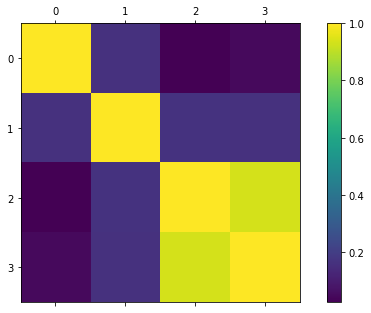

In [23]:
a = plt.figure(figsize=(10, 5))

plt.matshow(movies_horror_condensed.corr(), fignum=a.number)
ab = plt.colorbar()

In [25]:
movies_horror = movies_horror.to_csv('movies_horror.csv')